# First Python Coding Example:

# Bifurcation Diagram of the Logistic Map
---------

Let's start with the example presented in Ch. 1 of Shorghofer involving the dynamics of the logistic map. This is an interesting example to start with because it is a known case where numerical simulations led to the discovery of new science involving the unversality of the period-doubling transition to chaos.

For a discussion of the logistic map and how to analyse it using Matlab, check out Prof. Brunton's Youtube video:
https://www.youtube.com/watch?v=_BvAkyuWhOI&t=2s

----------

## Implement logistic bifurcation diagram in Python

Let's start by defining key terms:

- A __map__ is a function: it takes an input value (and possibly paramter values) and returns an output value

- __Iterated__ means that we will repeatedly apply the function to produce a sequence of updated values:

    0) Start with an initial value $x_0$; i.e. $x_k$ with $k=0$ 
    
    1) Apply the function to compute the next value $x_{1} = f(x_0,r)$ or more generally $x_{k+1} = f(x_k,r)$
    
    2) Repeat step 1) to produce a sequence of values $x_0, x_1,x_2, \ldots$
    
- __Bifurcation__ (from the same root as "fork") 

    - involves characterizing the __steady-state__ behavior (what is left after dropping the initial portion of the sequence)
    
    - Does the system reach an equilibrium? Some other steady-state behavior?
    
    - How does steady-state vary with parameter value? (And sometimes initial value...)
    
- The __logistic__ function is a classic __sigmoid__ function that starts growing at an initial rate, but the growth rate gradually decreases until the function approaches a constant limiting value. The continuous domain version is:
$$ f(x) = \frac{1}{1+e^{-x}}$$
This is a common model in population dynamics. It describes a population with a proportional growth rate (for small populations) subject to resource limitations that cause the growth rate to decrease as the population increases. One typical behavior involves growth at a gradually decrasing rate until a maximum sustainable population, the carrying capacity, is reached asymptotically.

Here we consider a __discrete time__ version that involves a __difference equation__ or __iteration/update formula__ instead of a differential equation. Let's jump right into creating a Python implementation.

Start by assigning values for parameter and initial value, then code up the function and compute a sequence of iterates:

In [2]:
# Assign values (using `=`) for inial value x0 and parameter value r
x0 = 0.5
r = 0.1
#Print the type and assigned value of x0
print('The type of x0 is',type(x0), '.\nThe value of x0 =', x0)
print('The type of x0 is', type(x0))
print('The value of x0 is', x0)

The type of x0 is <class 'float'> .
The value of x0 = 0.5
The type of x0 is <class 'float'>
The value of x0 is 0.5


Compute the value after the first application of the function $f$; i.e. `f[x0,r]`.

In [3]:
x1 = r * x0 * (1-x0)
print('x1 = ', x1)

x1 =  0.025


Compute the next iterate and print the initial sequence of values:

In [4]:
x2 = r * x1 * (1-x1)
first_three = x0,x1,x2 #store a tuple with the first 3 values associated with the name `first_three`
print('First 3 values: ', first_three)

First 3 values:  (0.5, 0.025, 0.0024375000000000004)


----

Since we will appply $f$ many times, let's define a corresponding python function `f`
that takes a general input value rather than having to type 
it repeatedly for each input value.

### Recall that specification of a function in python includes:

----

- A definition line including:
<br><tab> `def`
<br><tab> function name
<br><tab> parentheses holding argument names separated by commas
<br><tab> colon
----
    
- Docstring
<br><tab> Delimited by triple quotes
<br><tab> State action of function
<br><tab> Arguments (inputs): type and meaning
<br><tab> Return (output)
----    
- Code block
<br><tab> delimited by indentation
<br><tab> implement action of function
<br><tab> finish by returning output (typically)
----
Now let's look at an impementation of the function corresponding to the logistic map:

In [5]:
def f(x, r): # Definition line
    '''
    f(x,r) computes the logistic map
    
    Arguments:
        x: float input value
        r: float parameter value
    Returns:
        x_new: float updated value
    '''
    # The lines in the triple quotes above are the docstring
    # after evaluating this code, try ?f or `help(f)`
    x_new = r * x * (1-x)
    return x_new

Evaluating the code above defines the function. You can check that the definition is in place (and get info about the function from the docstring) using `?f` or `help(f)`:

In [6]:
?f

Signature: f(x, r)
Docstring:
f(x,r) computes the logistic map

Arguments:
    x: float input value
    r: float parameter value
Returns:
    x_new: float updated value
File:      ~/Dropbox/uwcourse/ME574/hw1/<ipython-input-5-1f5e822bbcae>
Type:      function


In [7]:
help(f)

Help on function f in module __main__:

f(x, r)
    f(x,r) computes the logistic map
    
    Arguments:
        x: float input value
        r: float parameter value
    Returns:
        x_new: float updated value



Now that the function has been defined, we can __call__ (or __execute__) the function. Let's start by checking that we can use the function `f(x,r)` to reproduce the initial iterates obtained above.

### Function call in python

A function call statement resembles the definition line that created the function but without `def` at the beginning or a colon at the end; that leaves:

`function_name(arg0, arg1, ...)`

So the output from the initial value is computed as follows:

In [8]:
f(x0,r)

0.025

Ths successfully reproduces the value computed previously, and we can combine the function call with an assignment to associate the value with a variable:

In [9]:
x1 = f(x0, r)
print(x1)

0.025


We can repeat that produce to confirm the value we computed previously for `x2`:

In [10]:
x2 = f(x1, r)
print('First 3 values: ', x0, x1, x2)
print('Previous result: ', first_three)

First 3 values:  0.5 0.025 0.0024375000000000004
Previous result:  (0.5, 0.025, 0.0024375000000000004)


So applying the function successfully reproduces the values we computed "manually" above. That is a good start, but we do not want to have to write a specific call for each iteration in a long sequence (possibly with hundreds or thousands of iterates). This is where control statements, in this case `for` loops, come into play.

Let's write a loop to compute the first `n` values in the iteration sequence with `n = 5`. Recall the indexing convention:

__ Python indexing starts at 0 __

so 5 values means indices 0, 1, 2, 3, and 4.

The convenient way to code such a sequence involves the python `range` function. Recall that the sequence produced by `range` does not include its argument, so the desired sequence should involve `range(n)` with `n = 5`. Let's code it up and check that it works:

In [11]:
n=5 #assign the stopping iteration number
x_old = x0 #assign the inital value to the input variable x_old
for i in range(n): #iterate over the desired sequence
    print('iteration ', i, ':', x_old) #print the iteration number and input value
    x_new = f(x_old, r) #comput the output value and assign to variable x_new
    x_old = x_new #assign the new (output) value top be the old (input) value for the next iterate

iteration  0 : 0.5
iteration  1 : 0.025
iteration  2 : 0.0024375000000000004
iteration  3 : 0.00024315585937500003
iteration  4 : 2.4309673460305166e-05


So we now have a way to compute and print a sequence of iterates, but what if we want to do something with the sequence (e.g. plot the iteration history or compute statistics of the "trajectory")?

Such purposes call for storing the sequence in a way that supports future mathematical operations.

We have already seen some basic python data types such as `int`, `float`, and `str`. Now we need to consider __containers__: structures that hold a collection of data.

Python includes several native containers including:

- __tuples:__ immutable ordered sequence of comma-separated values (optionally in parentheses)

- __lists:__ mutable ordered sequence of comma-separated values \[in square brackets\]

- __sets:__ unordered collection of comma-separated values {in braces}

- __dictionaries:__ unordered set of key:pair values

Elements of __ordered__ containers can be accessed by appending an `int` index value in square brackets.

__Immutable__ containers cannot be "edited". If you try to change what is stored in the container, a whole new container is actually created. Despite the limitations of immutability, we will still find occasional use for tuples.

Lists seem of interest because of their __mutability__, i.e. lists support insertion and deletion of elements but, as engineers, we want to perform operations operation corresponding to matrix/vector operations, and lists are simply not designed to work that way. Here is a quick example where we create 2 lists and "add" them:

In [12]:
a = [1,2,3]
b = [4,5,6]
print(a, " is of type ", type(a))
print(b, " is of type ", type(b))

[1, 2, 3]  is of type  <class 'list'>
[4, 5, 6]  is of type  <class 'list'>


Now let's see what happens when we try addition or scalar multiplication with the lists:

In [13]:
print("a+b produces ", a+b)
print("3*a produces ", 3*a)

a+b produces  [1, 2, 3, 4, 5, 6]
3*a produces  [1, 2, 3, 1, 2, 3, 1, 2, 3]


While there is nothing "wrong" with this behavior, it is just __NOT__ what we need for engineering computation.

The container we need for engineering computation is called an `array`. Since python grew up as a general use language and most people are not engineers, __the `array` container__ is not included in the base python language. Instead it lives in the __`numpy` library__ (pronounced either "num-pie" or "num-pee"). The name is a mashup of "numerical" and "python", and it is foundational to engineering computation in python. You should expect to use `numpy` containers and functions in every code you write. For the purposes of this class, the libraries of greatest importance will be `numpy` (that supports `array` functionality) and `numba` (that we will encounter very soon when we start parallelizing our codes).

While the basic elements of the python language are available immediately upon starting a python session, we need to __`import`__ library containers and functions before we can use them. There are several ways to `import` functionality in python. Here we will specifically discuss importing `numpy` functionality. The simplest version is the simple statement `import numpy`, after which we have access to the `array` container from `numpy`. Let's see the import in action and have a first look at arrays:

In [14]:
import numpy #import numpy functionality

arr_a = numpy.array(a) #assign to variable arr_a the numpy array with entries corr. to entries in list a
arr_b = numpy.array(b) #assign to variable arr_b the numpy array with entries corr. to entries in list b
#print the input arrays
print("arr_a = ", arr_a)
print("arr_b = ", arr_b)
print("arr_a + arr_b = ", arr_a + arr_b) #print sum of arrays
print("2.5 * arr_a = ", 2.5*arr_a) #print scalar multiple of arr_a
print("Dot product = ", numpy.dot(arr_a, arr_b)) #print dot/inner product of arrays
print("Alternative Dot Product = ", arr_a.dot(arr_b))

arr_a =  [1 2 3]
arr_b =  [4 5 6]
arr_a + arr_b =  [5 7 9]
2.5 * arr_a =  [2.5 5.  7.5]
Dot product =  32
Alternative Dot Product =  32


The first and most important thing to notice is that the array operations correspond precisely to the vector operations (elementwise addition, scalar multiplication, and dot/inner/scalar product) we need for engineering computation.

There is also an important syntax detail to note involving things like `numpy.array`, `numpy.dot`, and `arr_a.dot(arr_b)`. Under the hood, python is an __object-oriented__ language. While we will do our best to avoid getting sidetracked by the details of object-oriented programming, it is helpful here to acknowledge the object-oriented aspect of the language to explain this sort of syntax. Items that belong to a library or a class of objects are referenced by the name of the library or class followed by a period. The array container from the numpy library is accessed using `numpy.array`, and a dot product of the numpy arrays can be written as `numpy.dot(arr_a, arr_b_)`. There is also an equivalent alternative `arr_a.dot(arr_b)` which takes advantage of the fact that `arr_a` is a numpy array, and numpy arrays come with associated functions (or __methods__) and parameters (__members__ or __attributes__). Here the dot product is written using `.dot()` as an extension of the name of a numpy array. Again, we will aim to avoid getting hung on such details, but do keep an eye out for naming conventions using periods.

> For more details related to this syntax issue, the appropriate search term is `namespace`.

Before moving on, let's note that `numpy` is used so frequently that it is common to use a form of the import statement that uses `as` to define a shorthand:

In [15]:
import numpy as np #import with alternative shorthand name

#create numpy array of length 6 initialized to zeros
n=6
a0 = np.zeros(n)
print("a0 = ", a0)

a0 =  [0. 0. 0. 0. 0. 0.]


Now let's get back to the mission of computing and storing a sequence of iterates of the logistic map. The plan is now to store the iterates in a numpy array. Since (unlike lists which allow insertion and deletion of elements) the dimensions (number of elements or `shape`) of a numpy array must be set at the time when the array is created. As a result, the typical approach is not to compute an element and append it to the array but to create an array of the desired size at the beginning and to store  each iterate, as it is computed, in the appropriate position in the array.

Let's look at an implementation that stores 10 elements of the iteration sequence:

In [16]:
# Specify the number of entries n in the array
# Note that n is an 'int' instead of a 'float', but we do not need to say so explicitly
n = 10
#assign the parameter value
r = 0.1
#create an array to hold n elements (each a 64 bit float)
x = np.zeros(n, dtype=np.float64) 
#we do not always need to declare types explicitly, but the line above shows how to do so when desired

#assign the initial value
x_old = x0
#paste in the loop developed above to compute and print iterates
#replace the print statement with a statement that stores x_old as the i**th element in the array x
for i in range(n): #iterate over the desired sequence
    x[i] = x_old
    x_new = f(x_old, r) #compute the output value and assign to variable x_new
    x_old = x_new #assign the new (output) value top be the old (input) value for the next iterate

#unindent to exit the loop and print the array of iterates
print(x)

[5.00000000e-01 2.50000000e-02 2.43750000e-03 2.43155859e-04
 2.43096735e-05 2.43090825e-06 2.43090234e-07 2.43090175e-08
 2.43090169e-09 2.43090168e-10]


This formatting makes numbers hard to read, but there are ways to control formatting of output; for example:

In [17]:
numpy.set_printoptions(precision=10,suppress=True)
print(x)

[0.5          0.025        0.0024375    0.0002431559 0.0000243097
 0.0000024309 0.0000002431 0.0000000243 0.0000000024 0.0000000002]


We now have our first set of data, but the mass of digits above is perhaps not the best way to gather information from the data; so let's create a plot to see if that is more informative.

How do we plot data in python? Suppose no other information was provided, how would you proceed?

> __Note__ This question sets up possibly the most useful thing you will learn in this course!

So, seriously, how would you proceed to figure out how to plot the data if this notebook provided no further information?

If you just forged ahead at this point to find information delivered to you later in this notebook, that is a problematic sign because it indicates that you are just getting to a short-term goal rather than learning the things that will benefit you in the long term.

If you took a minute to think about it and said something like "I would put some relevant key words in my favorite search engine!", then you are on your way to developing a skill set that will be valuable in the long-term.

Once you decide on an internet search, what keywords would you select?
Give it a try and see what you find. 

If you do not have semi-immediate success, try a keyword set like "python plot". (It is often good to add the keyword "Jupyter" if you want info pecific to running code in a notebook and to include the year to get more recent information.)

Check out a few of the links and find sample code that produces something like you are trying to do then copy, paste, and edit until it does what you want.

> __Note:__ A reminder about academic integrity - If you make significant use of code that you found from another source, you __must__ cite that source and give credit to the author.

You should pretty quickly find a link to information about the `matplotlib` library for plotting in python.

Below is some sample code adapted from https://matplotlib.org/tutorials/introductory/pyplot.html



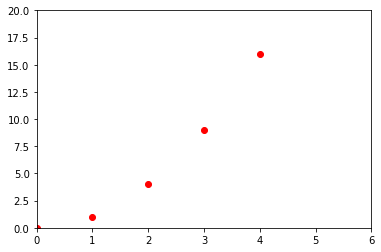

In [18]:
import matplotlib.pyplot as plt #import matplotlib.pyplot under abbreviated name plt
#plot given lists of abscissas (x-coordinates) and ordinates (y-coordinates) and a style directive (for red circles)
plt.plot([0,1,2,3,4], [0,1,4,9,16], 'ro')
#define the desired range for the axes [xmin, xmax, ymin, ymax]
plt.axis([0, 6, 0, 20])
#shoe the plot
plt.show()

If executing the snippet above produced a message but no plot, try executing the following "magic" command (yes, the special cJupyter commands that start with `%` are officially called "magic" commands) and then going back to re-execute the cell above. 

In [19]:
%matplotlib inline

Try deleting the first argument (the list `[0,1,2,3,4]`) and running the plot code again:

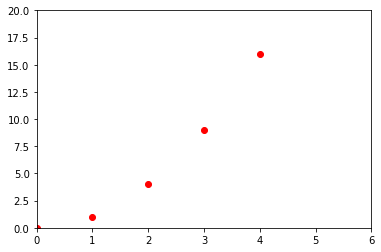

In [20]:
plt.plot( [0,1,4,9,16], 'ro')
#define the desired range for the axes [xmin, xmax, ymin, ymax]
plt.axis([0, 6, 0, 20])
#shoe the plot
plt.show()

Note that the result is unchanged, so given a single list of values, they are treated as the ordinates and the index values are the default abscissas.

Now let's try it with a numpy array instead of a list; specifically plot the array `x` of logistic iterates

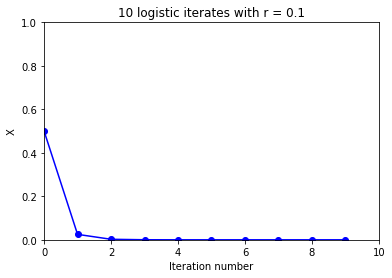

In [21]:
plt.plot(x, 'bo', linestyle = '-') #plot the array of iterates using blue circles connected by solid lines
plt.axis([0, 10, 0, 1]) #set the axis extents
#create labels for each axis and a title for the plot
plt.xlabel('Iteration number')
plt.ylabel('X')
plt.title(str(n) + ' logistic iterates with r = ' + str(r))
plt.show()

The next step is to incorporate the code snippets developed above into functions that (1) compute an array of iterates (given an intial value and a parameter value) and (2) plot the array. A good way to start is to write the definition line and the docstring:

In [22]:
def logisticArray(x0,r,n):
    '''
    Conpute an array of iterates of the logistic map f(x)=r*x*(1-x)
    
    Inputs:
        x0: float initial value
        r:  float parameter value
        n:  int length of iterate array
        
    Returns:
        x:  numpy array of n float64 values
    '''
    

This is a good time for a little coding exercise. Fill in the code block for `logisticArray` to implement the functionality described in the docstring, then test your code with the function call in the cell below:

In [23]:
y = logisticArray(x0,r,n)
print(x0)
print(y)

0.5
None


Does your function reproduce the results computed above and stored in the numpy array `x`?

For such a short array you may not mind doing this visually, but there are other methods that would work better for larger arrays.

> __Quick challenges:__ 

- Find a way to quantify the difference between the 2 numpy arrays 'x' and 'y'. You might want to search for a numpy function that would be helpful. (A version of this question also occurs as part of Homework 1.)
    
- Write a `logisticPlot` function that takes an initial value, parameter value, and number of iterates and produces a plot of the corresponding array of iterates.

Give these a try before continuing to read below. 

### Some implementations

__Code for `logisticArray`__ - just take the skeleton (definition line and docstring), copy and paste from above, and return the computed array at the end:

In [24]:
def logisticArray(x0,r,n):
    '''
    Conpute an array of iterates of the logistic map f(x)=r*x*(1-x)
    
    Inputs:
        x0: float initial value
        r: float parameter value
        n: int length of iterate array
        
    Returns:
        x: numpy array of n float64 values
    '''
    #create an array to hold n elements (each a 64 bit float)
    x = np.zeros(n, dtype=np.float64) 
    x_old = x0 #assign the initial value
    for i in range(n): #iterate over the desired sequence
        x[i] = x_old
        x_new = f(x_old, r) #compute the output value and assign to variable x_new
        x_old = x_new #assign the new (output) value top be the old (input) value for the next iterate
    return x

When you write code, you will produce error messages, and this brings us to another important lesson:

> __Important lesson:__ While nobody likes to get error messages, you NEED to get used to reading them in some detail. When you cannot immediately interpret the problem, search for the specific error message in the documentation (i.e. copy the error message and paste it into your favorite internet search engine) to get help.

__Writing a `logisticPlot` function:__

The first step is to compute the array of logistic map iterates, but this is exactly what `logisticArray` does so, after the definition line and the docstring, there is a call to `logisticArray` followed by plotting calls similar to those used above:

In [25]:
def logisticPlot(x0,r,n):
    '''
    Plot an array of iterates of the logistic map
    
    Arguments:
        x0: float initial value
        r: float parameter value
        n: int number of iterates
        
    Returns:
        None, but produces a plot
    '''
    x = logisticArray(x0,r,n)
    plt.plot(x, 'bx', linestyle = '-')
    plt.axis([0, n, 0, 1])
    plt.xlabel('Iteration number')
    plt.ylabel('x value')
    plt.title('Iterations of the logistic map')
    plt.text(.1, .5, r'$x_0=0.5, r=$'+str(r))
    plt.show()

After executing the definition, call the function to see how it works:

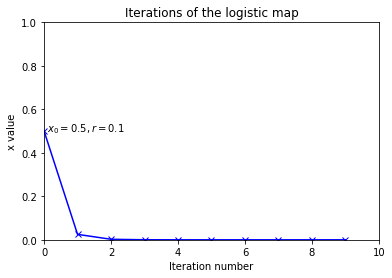

In [26]:
logisticPlot(x0,r,n)

Now we have the functionality to start exploring the behavior of the logistic map as a dynamical system. For $r=0.1$, the iteration approaches an equilibrium value at $x=0$.

Experiment with different values of `r` across the interval $[0,4]$. What sort of steady-state behaviors do you see? Roughly how many iterations does it typically take for the transient behavior to die out? Below is an example of a rather different-looking behavior:

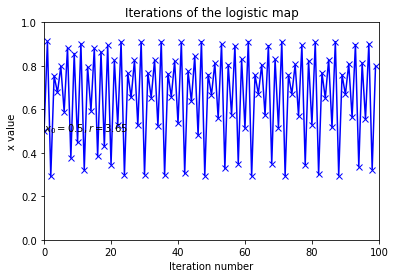

In [27]:
n = 100
logisticPlot(x0,3.65,n)

Now let's pursue a standard way of organizing and presenting this information.

The first step is to create a `logisticSteadyArray` that works just like `logisticArray` but avoids the transient behavior. How would you implement such a function? One way is to just modify `logisticArray` and to have 2 length inputs, `n_transient` (the number of initial iterates that are not stored) and `n_ss` (the number of iterates to store at the end to characterize the steady-state).

Here is an implementation:

In [28]:
def logisticSteadyArray(x0,r,n_transient, n_ss):
    '''
    Conpute an array of iterates of the logistic map f(x)=r*x*(1-x)
    
    Inputs:
        x0: float initial value
        r: float parameter value
        n_transient: int number of initial iterates to NOT store
        n_ss: int number of iterates to store
        
    Returns:
        x: numpy array of n float64 values
    '''
    #create an array to hold n elements (each a 64 bit float)
    x = np.zeros(n_ss, dtype=np.float64) 
    x_old = x0 #assign the initial value
    for i in range(n_transient):
        x_new = f(x_old, r)
        x_old = x_new
    for i in range(n_ss): #iterate over the desired sequence
        x[i] = x_old
        x_new = f(x_old, r) #compute the output value and assign to variable x_new
        x_old = x_new #assign the new (output) value top be the old (input) value for the next iterate
    return x

It is pretty esay to see that the behavior really changes for different values of `r`. 

### Let's compute a steady-state history for an array of `r` values and plot them together (a.k.a. create a bifurcation diagram).

The basic game plan is to loop over values or `r` between 0 and 4 and compute the values of `x` that occur in the steady-state behavior.

This gives us an opportunity to introduce a very useful tool, `numpy.linspace(start, stop, m)` which produces an array of `m`  equally spaced values including `start` and `stop`. Here is an example:

In [29]:
np.linspace(0,4,9)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

Let's put `numpy.linspace` to work to define a sequence of `r` vakues at which to compute the steady-state values of `x`:

In [55]:
#initialize parameters for iteration sequences
n_ss = 8 #number of "steady-state" iterates to store
n_transient = 100 #number of transient iterates that are not store
x0 = 0.5 #initial value of x

#define sequence of r values
rmin = 0
rmax = 4
m = 16 #number of r values
# Create the m equally spaced values of r using linspace
r = numpy.linspace(rmin,rmax,m)

#create a 2D numpy array (init to zero) to store n_ss values at each of the m values of r.
x = numpy.zeros([m,n_ss])

#loop over the the number of entries in the r array (found using 'r.shape[0]`)
for j in range(r.shape[0]):
    tmp = logisticSteadyArray(x0, r[j], n_transient, n_ss) #compute the steady-state array
    for i in range(n_ss): #loop over the number of steady-state values
        x[j,i] = tmp[i] #store the value as the appropriate entry in the 2D array
    
print(numpy.round(x,4))

[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.25   0.25   0.25   0.25   0.25   0.25   0.25   0.25  ]
 [0.375  0.375  0.375  0.375  0.375  0.375  0.375  0.375 ]
 [0.4643 0.4643 0.4643 0.4643 0.4643 0.4643 0.4643 0.4643]
 [0.5312 0.5312 0.5312 0.5312 0.5312 0.5312 0.5312 0.5312]
 [0.5833 0.5833 0.5833 0.5833 0.5833 0.5833 0.5833 0.5833]
 [0.625  0.625  0.625  0.625  0.625  0.625  0.625  0.625 ]
 [0.659  0.6591 0.659  0.6591 0.659  0.6591 0.659  0.6591]
 [0.513  0.7995 0.513  0.7995 0.513  0.7995 0.513  0.7995]
 [0.4752 0.8645 0.406  0.836  0.4752 0.8645 0.406  0.836 ]
 [0.7937 0.6113 0.8871 0.374  0.8741 0.411  0.9037 0.3248]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]


This produces an array for which each row is the "steady-state" for a given `r` value. Let's plot the data to try to communicate more information.

r = (16,),
 x= (16, 8)


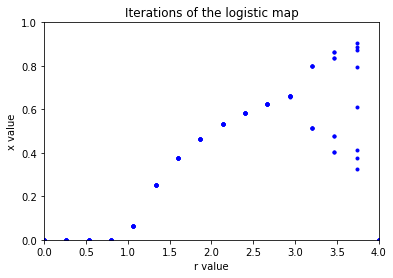

In [56]:
print("r = {},\n x= {}".format(r.shape, x.shape))
plt.plot(r, x, 'b.')
plt.axis([0, 4, 0, 1])
plt.xlabel('r value')
plt.ylabel('x value')
plt.title('Iterations of the logistic map')
#plt.text(.1, .5, r'$x_0=0.5, \beta=0.1$')
plt.show()

Rather remarkably, numpy does the right thing and we obtain a first look at the bifurcation diagram, but at a very coarse resolution.

> __Pointer:__ It is almost always a good idea to develop your code based on a smaller lower-resolution case. Once you have tested that it works well on the small case, then it is time to consider larger versions. Working with large arrays while developing code is a recipe for slow progress and frustration; so __start small, test, and then GO BIG!__

Having developed small and tested, here is a more refined version that might look more familiar:

In [50]:
m = 1024
n_ss = 1024
n_transient = 100
x0 = 0.5

rmin = 2.5
rmax = 4.0
# Create the m equally spaced values of beta using linspace
r = numpy.linspace(rmin,rmax,m)

#create a 2D numpy array (init to zero) to store n_ss values at each of the m r values.
x = numpy.zeros([m,n_ss])

for j in range(r.shape[0]):
    tmp = logisticSteadyArray(x0, r[j], n_transient, n_ss)
    for i in range(n_ss):
        x[j,i] = tmp[i]
    
print(numpy.round(x,4))

[[0.6    0.6    0.6    ... 0.6    0.6    0.6   ]
 [0.6002 0.6002 0.6002 ... 0.6002 0.6002 0.6002]
 [0.6005 0.6005 0.6005 ... 0.6005 0.6005 0.6005]
 ...
 [0.0133 0.0526 0.1991 ... 0.743  0.7632 0.7224]
 [0.9967 0.0133 0.0526 ... 0.0863 0.3153 0.8633]
 [0.     0.     0.     ... 0.     0.     0.    ]]


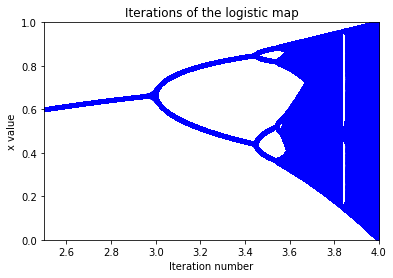

In [51]:
for j in range(n_ss):
#     print(r.shape)
#     print(x.transpose()[j].shape)
    plt.plot(r,x.transpose()[j], 'b.')

# print(r.shape, x.shape)
plt.plot(r, x.transpose()[-1], 'b')
plt.axis([rmin,rmax, 0, 1])
plt.xlabel('Iteration number')
plt.ylabel('x value')
plt.title('Iterations of the logistic map')
#plt.xscale("log")
#plt.text(.1, .5, r'$x_0=0.5, r=0.1$')
plt.show()

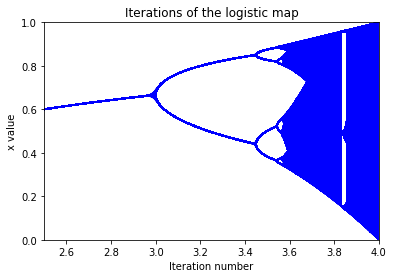

In [53]:
# print(r.shape, x.shape)
plt.plot(r, x, 'b')
plt.axis([rmin,rmax, 0, 1])
plt.xlabel('Iteration number')
plt.ylabel('x value')
plt.title('Iterations of the logistic map')
#plt.xscale("log")
#plt.text(.1, .5, r'$x_0=0.5, r=0.1$')
plt.show()

We have arrived at our goal. This is a version of the famous bifurcation diagram of the logistic map. This led to the discovery of the period-doubling route from equilibrium to chaos and to Feigenbaum's proof of the universality of the scaling laws governing this phenomenon. As Shorghofer points out, this is one of the great examples of scientific discovery growing out of numerical simulation.

That does it for an initial experience coding up a meaningful example in python. You should now be ready to start working on HW#1.